# Random queries generated by agent

In [26]:
from DemoScript import *
import matplotlib
import random_query_params as params
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10,5]

import warnings
warnings.filterwarnings("ignore") 

In [27]:
matplotlib.rcParams['figure.figsize'] = [10,5]

First read the raw data and store only the points where proposition changes were observed

In [28]:
params.nTraj = 2
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)
params.nSamples = 20000
params.nBurn = 500

## Batch Inference

In [29]:
infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Random_Data/CompressedData' --outPath 'Random_Distributions' --nTraj 2


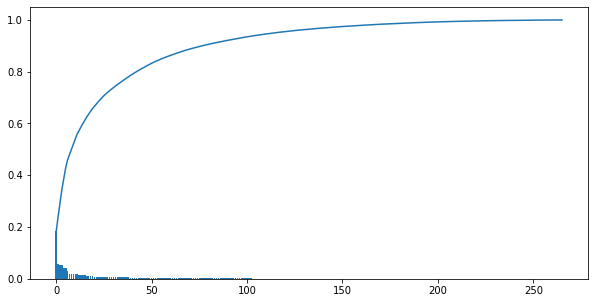

In [30]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

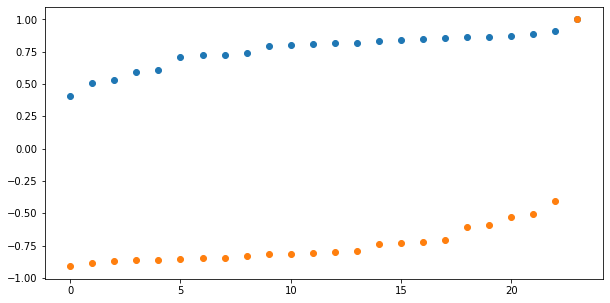

In [31]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

## Query 1

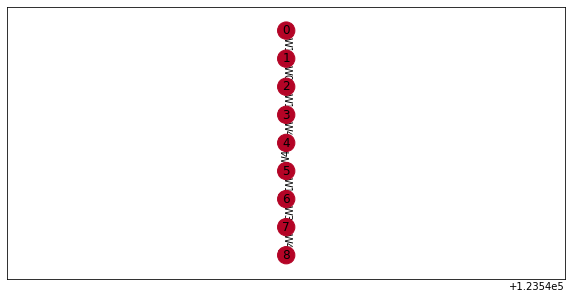

In [32]:
query1 = create_random_query(MDP, verbose = True)

**Get user label**

In [33]:
label = False
new_traj = create_query_demo(query1['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 1)

Writing file: query_1.json


**Update the distribution**

In [34]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 1'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Random_Data/CompressedData' --outPath 'Random_Distributions' --nQuery 1


**Plot the updated distribution**

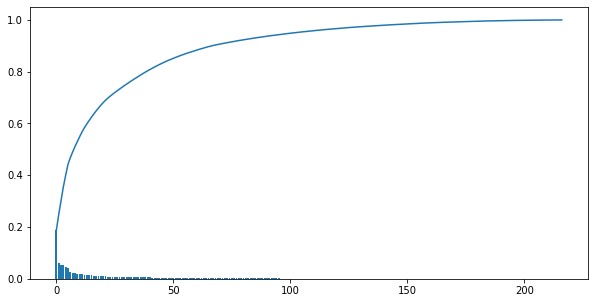

In [35]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

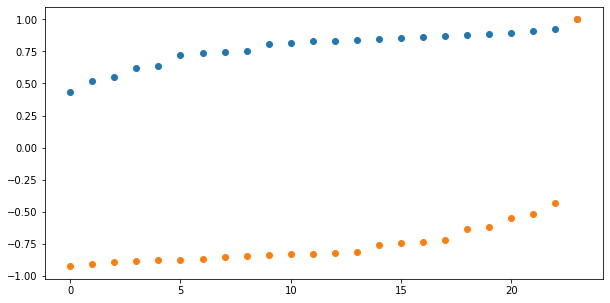

In [36]:
rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

## Query 2

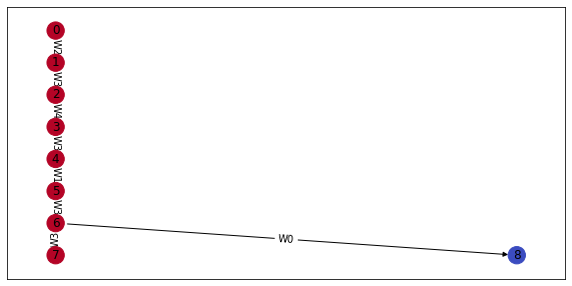

In [37]:
query2 = create_random_query(MDP, verbose = True)

**Get user label**

In [38]:
label = False
new_traj = create_query_demo(query2['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 2)

Writing file: query_2.json


**Update the posterior**

In [39]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 2'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Random_Data/CompressedData' --outPath 'Random_Distributions' --nQuery 2


**Plot the new posterior**

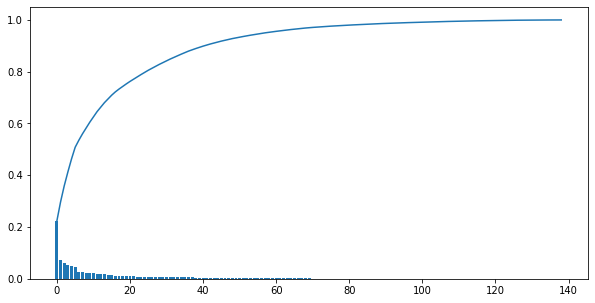

In [40]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

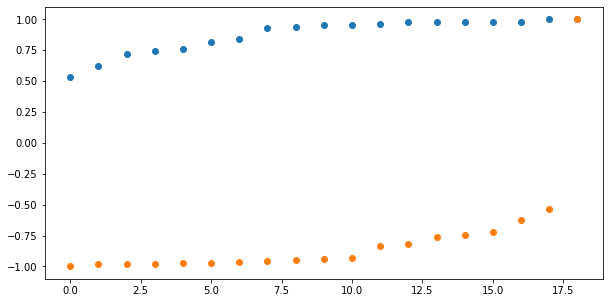

In [41]:
rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

## Query 3

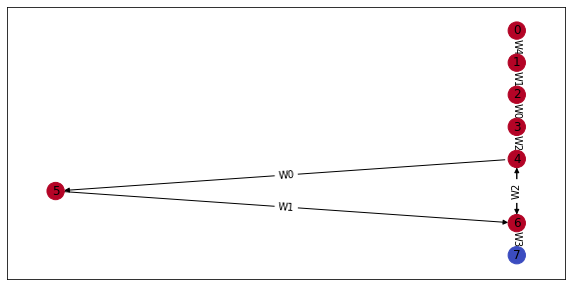

In [42]:
query3 = create_random_query(MDP, verbose = True)

**Get the user label**

In [43]:
label = False
new_traj = create_query_demo(query3['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 3)

Writing file: query_3.json


**Update the posterior**

In [44]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 3'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Random_Data/CompressedData' --outPath 'Random_Distributions' --nQuery 3


**Plot the updated posterior. This is the final posterior**

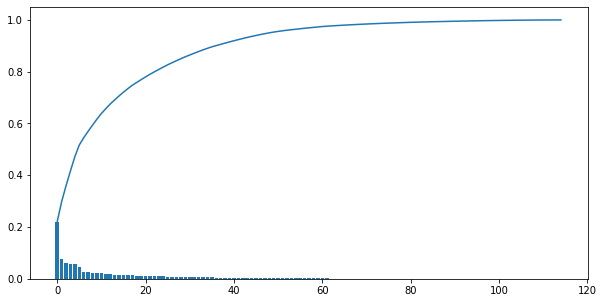

In [45]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

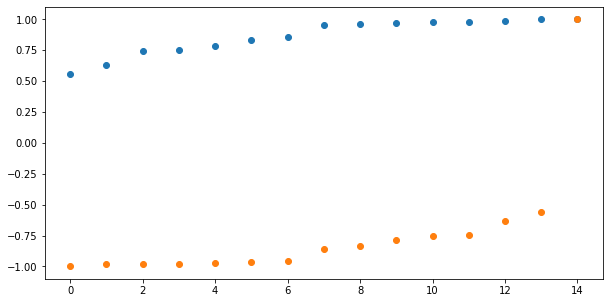

In [46]:
rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

In [50]:
MDP.specification_fsm._formulas[100]

['and',
 ['F', ['W0']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W0']]]